In [1]:
from collections import deque
from functools import lru_cache
from itertools import accumulate, product

import gmpy2
import numpy as np
from scipy.stats import binom

from typing import Tuple
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

In [29]:
def maxR(p, p_A=0.99):
    try:
        return np.where([float(compute_certificate_gmpy(x, p, p_A)) > 0.5 for x in np.arange(1, 100)])[0][-1]+1
    except:
        return 0

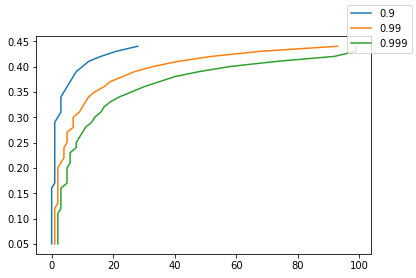

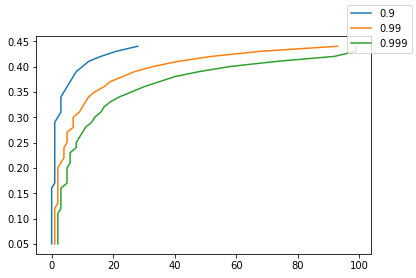

In [30]:
fig, ax = plt.subplots()
for p_A in [0.9, 0.99, 0.999]:
    ps = np.arange(0.05, 0.5, 0.01)[:-5]
    Rs = [maxR(p, p_A) for p in ps]
    ax.plot(Rs, ps, label=p_A)
fig.legend()
fig

NameError: name 'p' is not defined

In [70]:
from communityaware.cert import compute_certificate_gmpy
from scipy.optimize import minimize_scalar
import numpy as np
import matplotlib.pyplot as plt

In [71]:
def getdata(p_A, R):
    p1 = np.arange(0.01, 0.5, 0.001)
    data = []
    for p in p1:
        sol = minimize_scalar(lambda x: np.abs(float(compute_certificate_gmpy(R, (p, x), p_A))-0.5), bounds=(0.0001, 0.51), method='bounded')
        data.append((p, sol.x, sol.success, sol.fun))
    data = np.array(data)
    return data

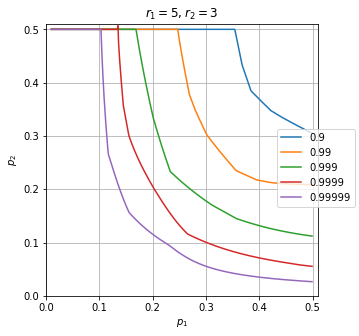

In [72]:
fig, ax = plt.subplots(figsize=(5, 5))
R = (5, 3)
for p_A in [0.9, 0.99, 0.999, 0.9999, 0.99999]:
    data = getdata(p_A, R)
    assert np.all(data[:, 2]) # checks all optimisations converged... 
    ax.plot(data[:, 0], data[:, 1], label=p_A)

ax.set_xlim(0, 0.51)
ax.set_ylim(0, 0.51)
ax.set_xlabel(r'$p_1$')
ax.set_ylabel(r'$p_2$')
ax.set_aspect('equal', adjustable='box')
ax.grid()
ax.set_title(r'$r_1=5, r_2=3$')
fig.legend(loc='right')

Isotropic

In [16]:
from scipy.stats import binom
from scipy.special import betainc
import matplotlib.pyplot as plt
import numpy as np

In [25]:
def region(q, R, p):
    return ((1-p)/p)**(R-2*q)


In [43]:
R = 5
p = 0.2
q = 1
p_A = 0.6723199999999999

binom.pmf(R-q, R, p)

0.0064

We consider no partial regions and notice that $a^\star$ is $4$ as the below sum is $p_A$

In [47]:
np.isclose(binom.pmf(0, R, 1-p) + binom.pmf(1, R, 1-p) + binom.pmf(2, R, 1-p) + binom.pmf(3, R, 1-p)  + binom.pmf(4, R, 1-p), p_A)
a_star = 4

We can write $a^\star$ as the solution to the following equation

$$I_p(R-a^\star, a^\star+1) = p_A$$

Where $I$ is the incomplete beta function. Just a note that 

$$I_p(R-a^\star, a^\star+1) = 1 - I_{1-p}(a^\star+1, R-a^\star)

In [53]:
print(np.isclose(betainc(R-a_star, a_star+1, p), p_A))
print(np.isclose(betainc(R-a_star, a_star+1, p), 1-betainc(a_star+1, R-a_star, 1-p)))

True
True


Once we have $a^{\star}$ we compute the following 

$$\sum\limits_{q=0}^{a^\star} Bin(R, q, p)$$

Which is equal to 

$$\sum\limits_{q=0}^{a^\star} Bin(R, q, p) = I_{1-p}(R-a^\star, a^\star+1)$$

The certificate reduces to if $I_{1-p}(R-a^\star, a^\star+1) > 0.5$ given that $I_p(R-a^\star, a^\star+1) = p_A$.

By finding $a^\star$ such that $I_p(R-a^\star, a^\star+1) = p_A$ we can plug it into $I_{1-p}(R-a^\star, a^\star+1)$ and check if its above $0.5$.

Note that $1-p_A = 1 - I_p(R-a^\star, a^\star+1) = I_{1-p}(a^\star+1, R-a^\star)$

In [61]:
from scipy.optimize import minimize_scalar

def findastar(R, p, p_A):
    sol = minimize_scalar(lambda x: np.abs(betainc(R-x, x+1, p) - p_A), bounds=(0, R), method='bounded')
    assert sol.success
    return sol.x

In [62]:
findastar(R, p, p_A)

3.999999082206481

Perhaps we look instead at number of samples and alpha instead of pA

In [13]:
from statsmodels.stats.proportion import proportion_confint

n = 1000
confidence_level = 0.95

p_A = proportion_confint(int(0.9*n), n, alpha=2 * confidence_level, method='beta')[0]
p_A

0.9142865160321019

In [39]:
isotropic(5, 0.5, 0.9)

mpfr('0.90000000000000002220446049250313',100)

In [30]:
r = gmpy2.mpz(5)
p = gmpy2.mpfr(0.6)

sol = compute_regions(r, p)
likelihood_ratios, region_probability = sol.T

In [35]:
sol[:, 1]

array([mpfr('0.077759999999999985611509600857948',100),
       mpfr('0.25919999999999997601918266809653',100),
       mpfr('0.34560000000000000000000000000004',100),
       mpfr('0.23040000000000002131628207280272',100),
       mpfr('0.076800000000000014210854715202015',100),
       mpfr('0.010240000000000002842170943040406',100)], dtype=object)

In [31]:
likelihood_ratios

array([mpfr('0.13168724279835397038260766118837',100),
       mpfr('0.29629629629629637853503886112275',100),
       mpfr('0.66666666666666672834572359028612',100),
       mpfr('1.4999999999999998612221219218554',100),
       mpfr('3.3749999999999990632493229725242',100),
       mpfr('7.5937499999999964871849611469656',100)], dtype=object)

In [32]:
region_probability

array([mpfr('0.077759999999999985611509600857948',100),
       mpfr('0.25919999999999997601918266809653',100),
       mpfr('0.34560000000000000000000000000004',100),
       mpfr('0.23040000000000002131628207280272',100),
       mpfr('0.076800000000000014210854715202015',100),
       mpfr('0.010240000000000002842170943040406',100)], dtype=object)

In [82]:
from communityaware.cert import isotropic
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
p_A = 0.9
ps = np.arange(0.01, 1, 0.01)

In [67]:
def maxR(p, p_A):
    for r in range(1000):
        if isotropic(r, p, p_A) < 0.5:
            return r - 1
    else:
        return 1000

In [64]:
p=0.1

p_As = np.arange(0.5, 1, 0.001)

In [88]:
data = []
for p in np.arange(0.05, 0.45, 0.05):
    for p_A in p_As:
        data.append((p, p_A, maxR(p, p_A)))

In [89]:
data = pd.DataFrame(data, columns=['p', 'p_A', 'maxR'])

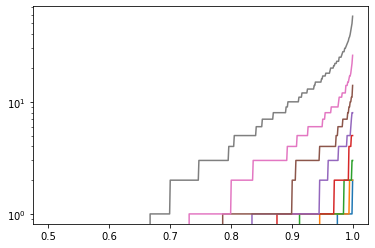

In [91]:
fig, ax = plt.subplots()
for p in data['p'].unique():
    ax.plot(data.query(f'p=={p}')['p_A'], data.query(f'p=={p}')['maxR'])
ax.set_yscale('log')

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45])